# Clusturing on the **UCI Wine Dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
!gdown 1ZRUs9VkDm7V7gf1ia9EwfGX42U9qKPpP # uci wine dataset

Downloading...
From: https://drive.google.com/uc?id=1ZRUs9VkDm7V7gf1ia9EwfGX42U9qKPpP
To: /content/002011001025_ManasPratimBiswas_Assignment1.ipynb
100% 2.03M/2.03M [00:00<00:00, 59.8MB/s]


In [ ]:
df = pd.read_csv("wine.csv", names=['class',"Alcohol","Malicacid","Ash","Alcalinity_of_ash","Magnesium","Total_phenols","Flavanoids","Nonflavanoid_phenols","Proanthocyanins","Color_intensity","Hue","0D280_0D315_of_diluted_wines","Proline"] )
X = df.drop('class',axis=1)
y = df["class"]
df.head()

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


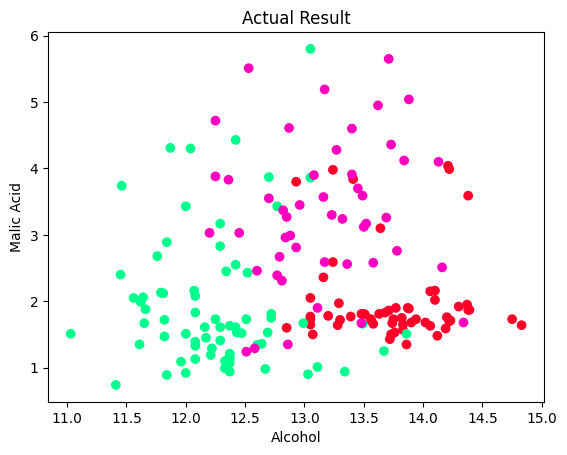

In [ ]:
# Actual Clustering Result
plt.title("Actual Result")
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.scatter(df.Alcohol, df.Malicacid, c=df["class"], cmap='gist_rainbow')


# **Partition Based: K-means Clustering on UCI Wine Dataset**

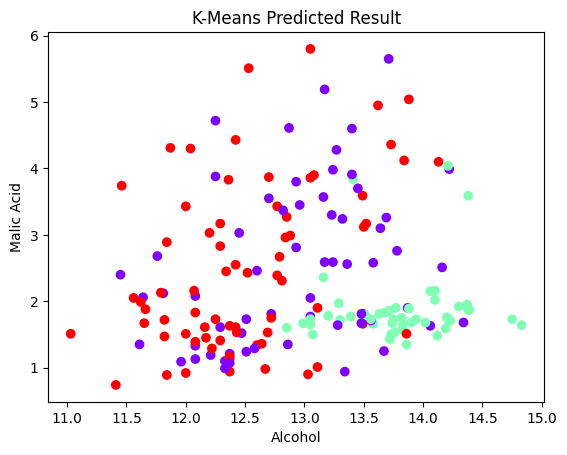

In [ ]:
# Clustering using K-means algorithm
from sklearn.cluster import KMeans
km = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)
y_predicted = km.fit_predict(X)
plt.title("K-Means Predicted Result")
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
plt.scatter(df.Alcohol, df.Malicacid, c=km.labels_, cmap='rainbow')
plt.show()

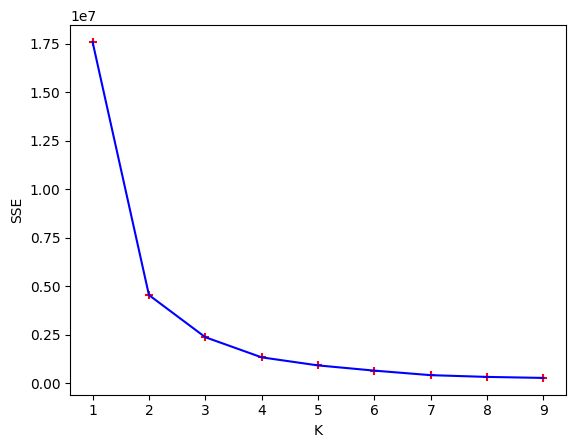

In [ ]:
# Visualisation of SSE (Sum of Squared Errors) & Elbow Graph:
sse = []
k_range = range(1, 10)
for k in k_range:
  km = KMeans(n_clusters=k, n_init=10)
  km.fit_predict(X)
  sse.append(km.inertia_)
plt.xlabel("K")
plt.ylabel("SSE")
plt.scatter(k_range, sse, color="red", marker="+")
plt.plot(k_range, sse, color="blue")
# We can see here, our elbow is at K=3

In [ ]:
# Evaluating Metrics
silhouette_result = silhouette_score(X, km.labels_)
print("Silhouette Score: ", silhouette_result)
calinski_result = calinski_harabasz_score(X, km.labels_)
print("Calinski-Harabasz Score: ", calinski_result)
davies_result = davies_bouldin_score(X, km.labels_)
print("Davies-Bouldin Score: ", davies_result)
# Evaluating Cohesion & Separation
labels = km.labels_
centroids = km.cluster_centers_
SSE = np.sum((X - centroids[labels])**2)
overall_centroid = np.mean(X, axis=0)
SSB = np.sum([np.sum((X[labels == i] - centroids[i])**2) for i in range(3)])
N = X.shape[0]
cohesion_scores = SSE/N
cohesion = np.mean(cohesion_scores)
separation = SSB/N
print(f"\nCohesion Score: {cohesion}")
print(f"Separation Score: {separation}")

Silhouette Score:  0.5268382724654646
Calinski-Harabasz Score:  1349.0505080106736
Davies-Bouldin Score:  0.5234636536066434

Cohesion Score: 117.21405645106327
Separation Score: 617.0812255328161


# **Density Based: DBSCAN Clustering in UCI Wine Dataset**

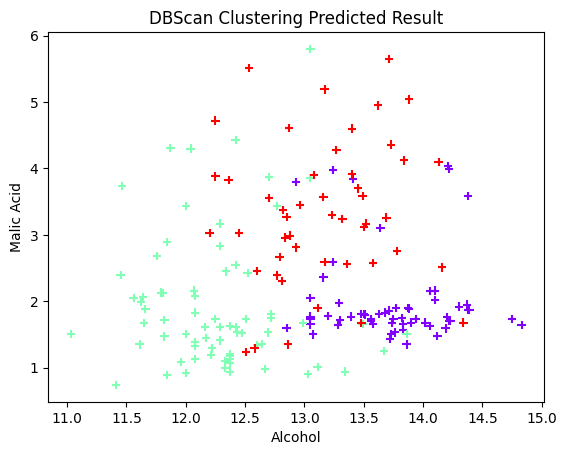

In [ ]:
# Clustering using DBSCAN Clustering algorithm
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, algorithm='auto', metric='euclidean')
y = dbscan.fit_predict(X)
plt.title('DBScan Clustering Predicted Result')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.scatter(df.Alcohol, df.Malicacid, c=df["class"], cmap='rainbow', marker="+")
plt.show()


# **Hierarchical Based: Dendogram Clusturing on UCI Wine Dataset**

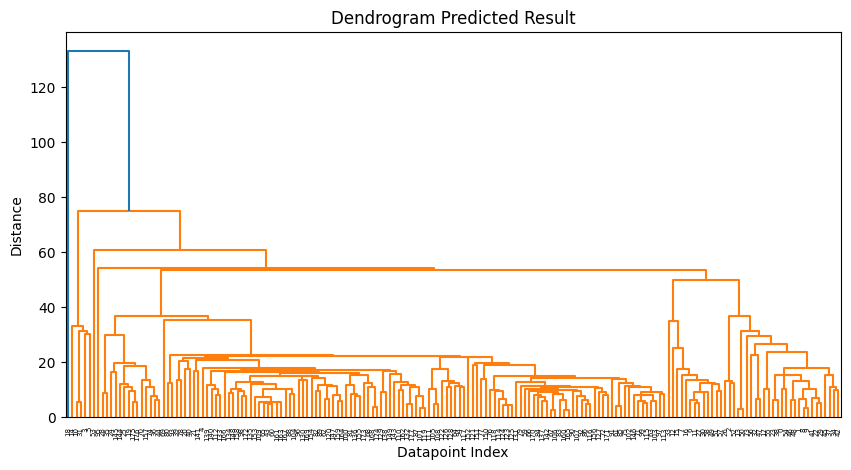

In [ ]:
# Clustering using Dendrogram Clustering algorithm
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(X, method='single')
# Create and plot the dendrogram
plt.figure(figsize=(10, 5))
dn = dendrogram(Z)
plt.title('Dendrogram Predicted Result')
plt.xlabel('Datapoint Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Evaluating Metrics
labels = fcluster(Z, 3, criterion='maxclust')
from sklearn.metrics import silhouette_score

silhouette_result = silhouette_score(X, labels)
print("Silhouette Score: ", silhouette_result)
from sklearn.metrics import calinski_harabasz_score
calinski_result = calinski_harabasz_score(X, labels)
print("Calinski-Harabasz Score: ", calinski_result)
from sklearn.metrics import davies_bouldin_score
davies_result = davies_bouldin_score(X, labels)
print("Davies-Bouldin Score: ", davies_result)

Silhouette Score:  0.4879820335189063
Calinski-Harabasz Score:  24.42036238154286
Davies-Bouldin Score:  0.30814096183494405
